In [43]:
#Q1
from keras import layers, models, optimizers,utils
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import StandardScaler,MultiLabelBinarizer,OneHotEncoder,LabelEncoder
import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


#Q2

#use these to install the libraries 
#pip3 install python_speech_features
#pip3 install librosa

from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import librosa
import matplotlib.pyplot as plt
import librosa.display
import sklearn
import numpy 
import math

In [5]:
#1.Classify the given set of images using a vanilla CNN( Don’t apply PCA for this!). Sample code for vanilla CNN:


train = pd.read_csv('styles.csv', error_bad_lines=False)    # reading the csv file
train['image'] = train.apply(lambda row: str(row['id']) + ".jpg", axis=1)    #adding a new column to map images
train.head(10)     #column image has the image ids


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


In [6]:
train_image = []
y=[]
for i in tqdm(range(train.shape[0])):
    try:
        img = image.load_img('images/'+str(train['image'][i]),target_size=(80,60))    #mapping the images to the images folder
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
        y.append(train['masterCategory'][i])       #taking classification variable from the metadata
    except:
        continue
        
X = np.array(train_image)    

100%|██████████| 44424/44424 [02:03<00:00, 359.04it/s]


In [7]:
#encoding the classification variable
cat=LabelEncoder()
Y=np.array(y)
new = cat.fit_transform(Y)
y_f=keras.utils.to_categorical(new,num_classes=len(np.unique(y)))
y_f.shape

(44419, 7)

In [8]:
X.shape

(44419, 80, 60, 3)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y_f, random_state=42, test_size=0.1)

In [10]:
#Applying CNN
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(80, 60,3))) 
#input image dimension: 80x 60
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_data=(x_test, y_test))

Train on 39977 samples, validate on 4442 samples
Epoch 1/10
39977/39977 [==============================] - 80s 2ms/step - loss: 0.5581 - accuracy: 0.7946 - val_loss: 0.3067 - val_accuracy: 0.8985
Epoch 2/10
39977/39977 [==============================] - 72s 2ms/step - loss: 0.2177 - accuracy: 0.9300 - val_loss: 0.1705 - val_accuracy: 0.9502
Epoch 3/10
39977/39977 [==============================] - 66s 2ms/step - loss: 0.1555 - accuracy: 0.9520 - val_loss: 0.1275 - val_accuracy: 0.9640
Epoch 4/10
39977/39977 [==============================] - 64s 2ms/step - loss: 0.1184 - accuracy: 0.9631 - val_loss: 0.1443 - val_accuracy: 0.9536
Epoch 5/10
39977/39977 [==============================] - 57s 1ms/step - loss: 0.0953 - accuracy: 0.9718 - val_loss: 0.1213 - val_accuracy: 0.9665
Epoch 6/10
39977/39977 [==============================] - 60s 2ms/step - loss: 0.0790 - accuracy: 0.9763 - val_loss: 0.1732 - val_accuracy: 0.9453
Epoch 7/10
39977/39977 [==============================] - 61s 2ms/ste

In [50]:
#2.PCA is one of the most common dimensionality reduction techniques used. 
#Using PCA with number of components ranging from 2 to 5, classify the given set of images using
#a.K-Nearest Neighbours ( consider k=7)
#b.Artificial Neural Network

#PCA for number components=2
new_x=np.reshape(X,(3553520,180))
x = StandardScaler().fit_transform(new_x)
pca = PCA(n_components=2)
pC = pca.fit_transform(x)
pC.shape=(44419,80,2)
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(pC, y_f, random_state=42, test_size=0.1)
x_train_k.shape
x_test_k.shape
x_train_k.shape=(39977,160)
x_test_k.shape=(4442,160)

In [51]:
#KNN
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train_k, y_train_k)

y_pred = classifier.predict(x_test_k)
print(classification_report(y_test_k, y_pred))
print("Accuracy score for KNN")
print(accuracy_score(y_test_k, y_pred, normalize=False))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1104
           1       0.98      0.98      0.98      2109
           2       0.97      0.97      0.97       968
           3       1.00      0.09      0.17        11
           4       0.00      0.00      0.00         0
           5       0.91      0.88      0.89       249
           6       0.00      0.00      0.00         1

   micro avg       0.96      0.96      0.96      4442
   macro avg       0.69      0.55      0.56      4442
weighted avg       0.96      0.96      0.96      4442
 samples avg       0.96      0.96      0.96      4442

Accuracy score for KNN
4250


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [52]:
clf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

clf.fit(x_train_k, y_train_k) 
y_pred_ann = clf.predict(x_test_k)
print(classification_report(y_test_k, y_pred_ann))
print("Accuracy score for ANN ")
print(accuracy_score(y_test_k, y_pred_ann, normalize=False))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1104
           1       0.97      0.99      0.98      2109
           2       0.98      0.96      0.97       968
           3       0.75      0.27      0.40        11
           4       0.00      0.00      0.00         0
           5       0.93      0.91      0.92       249
           6       0.00      0.00      0.00         1

   micro avg       0.97      0.96      0.96      4442
   macro avg       0.65      0.58      0.60      4442
weighted avg       0.97      0.96      0.96      4442
 samples avg       0.95      0.96      0.96      4442

Accuracy score for ANN 
4228


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [53]:
pca3 = PCA(n_components=3)
x.shape=(3553520,180)
pC3 = pca3.fit_transform(x)
pC3.shape=(44419,80,3)
x_train_k3, x_test_k3, y_train_k3, y_test_k3 = train_test_split(pC3, y_f, random_state=42, test_size=0.1)
x_train_k3.shape=(39977,240)
x_test_k3.shape=(4442,240)


#KNN
classifier.fit(x_train_k3, y_train_k3)
y_pred3 = classifier.predict(x_test_k3)
print(classification_report(y_test_k3, y_pred3))
print("Accuracy score for KNN")
print(accuracy_score(y_test_k3, y_pred3, normalize=False))
#ANN
clf.fit(x_train_k3, y_train_k3) 
y_pred_ann3 = clf.predict(x_test_k3)
print(classification_report(y_test_k3, y_pred_ann3))
print("Accuracy score for ANN ")
print(accuracy_score(y_test_k3, y_pred_ann3, normalize=False))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1104
           1       0.98      0.98      0.98      2109
           2       0.97      0.98      0.97       968
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.92      0.88      0.90       249
           6       0.00      0.00      0.00         1

   micro avg       0.97      0.96      0.96      4442
   macro avg       0.55      0.54      0.54      4442
weighted avg       0.96      0.96      0.96      4442
 samples avg       0.96      0.96      0.96      4442

Accuracy score for KNN
4264
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1104
           1       0.98      0.99      0.98      2109
           2       0.99      0.98      0.98       968
           3       0.25      0.09      0.13        11
           4       0.00      0.00      0.00       

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [54]:
pca4 = PCA(n_components=4)
#x = StandardScaler().fit_transform(new_x)
x.shape=(3553520,180)
pC4 = pca4.fit_transform(x)
pC4.shape=(44419,80,4)
x_train_k4, x_test_k4, y_train_k4, y_test_k4 = train_test_split(pC4, y_f, random_state=42, test_size=0.1)
x_train_k4.shape=(39977,320)
x_test_k4.shape=(4442,320)


#KNN
classifier.fit(x_train_k4, y_train_k4)
y_pred4 = classifier.predict(x_test_k4)
print(classification_report(y_test_k4, y_pred4))
print("Accuracy score for KNN ")
print(accuracy_score(y_test_k4, y_pred4, normalize=False))

#ANN
clf.fit(x_train_k4, y_train_k4) 
y_pred_ann4 = clf.predict(x_test_k4)
print(classification_report(y_test_k4, y_pred_ann4))
print("Accuracy score for ANN ")
print(accuracy_score(y_test_k4, y_pred_ann4, normalize=False))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1104
           1       0.97      0.99      0.98      2109
           2       0.99      0.99      0.99       968
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.93      0.89      0.91       249
           6       0.00      0.00      0.00         1

   micro avg       0.97      0.97      0.97      4442
   macro avg       0.55      0.54      0.55      4442
weighted avg       0.97      0.97      0.97      4442
 samples avg       0.97      0.97      0.97      4442

Accuracy score for KNN 
4297
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1104
           1       0.98      0.98      0.98      2109
           2       0.99      0.98      0.98       968
           3       0.25      0.09      0.13        11
           4       0.00      0.00      0.00      

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [55]:
pca5 = PCA(n_components=5)
#x = StandardScaler().fit_transform(new_x)
x.shape=(3553520,180)
pC5 = pca5.fit_transform(x)
pC5.shape=(44419,80,5)
x_train_k5, x_test_k5, y_train_k5, y_test_k5 = train_test_split(pC5, y_f, random_state=42, test_size=0.1)
x_train_k5.shape=(39977,400)
x_test_k5.shape=(4442,400)


#KNN
classifier.fit(x_train_k5, y_train_k5)
y_pred5 = classifier.predict(x_test_k5)
print(classification_report(y_test_k5, y_pred5))
print("Accuracy score for KNN ")
print(accuracy_score(y_test_k5, y_pred5, normalize=False))


#ANN
clf.fit(x_train_k5, y_train_k5) 
y_pred_ann5 = clf.predict(x_test_k5)
print(classification_report(y_test_k5, y_pred_ann5))
print("Accuracy score for ANN ")
print(accuracy_score(y_test_k5, y_pred_ann5, normalize=False))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1104
           1       0.97      0.99      0.98      2109
           2       0.99      0.99      0.99       968
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         0
           5       0.95      0.89      0.92       249
           6       0.00      0.00      0.00         1

   micro avg       0.97      0.97      0.97      4442
   macro avg       0.55      0.54      0.55      4442
weighted avg       0.97      0.97      0.97      4442
 samples avg       0.97      0.97      0.97      4442

Accuracy score for KNN 
4313
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1104
           1       0.98      0.98      0.98      2109
           2       0.99      0.99      0.99       968
           3       0.50      0.18      0.27        11
           4       0.00      0.00      0.00      

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [56]:
#3. CNN seems to be the most accurate among the three models.

MFCC is: [[-3.60436534e+01  0.00000000e+00 -3.20763172e-14 ... -3.27769755e-13
   0.00000000e+00  3.59484803e-13]
 [-3.60436534e+01  0.00000000e+00 -3.20763172e-14 ... -3.27769755e-13
   0.00000000e+00  3.59484803e-13]
 [-3.60436534e+01  0.00000000e+00 -3.20763172e-14 ... -3.27769755e-13
   0.00000000e+00  3.59484803e-13]
 ...
 [ 1.76819650e+01  2.59668906e+01 -1.01385931e+01 ...  7.80297896e+00
   1.73903728e+01  2.19868106e+01]
 [ 1.77617413e+01  1.50496420e+01 -5.03827067e+00 ...  4.07287944e+00
   5.72686985e+00  1.88498846e+01]
 [ 1.79277179e+01  1.68670486e+01 -8.67722586e+00 ...  2.03161633e+01
   1.30061782e+01  3.30330683e+01]]
Shape of MFCC: (53600, 13)


<IPython.core.display.Javascript object>


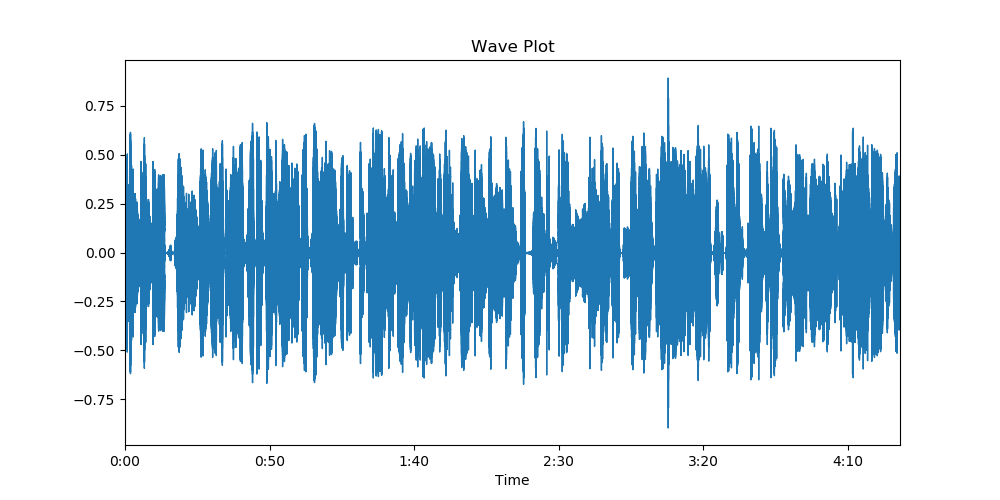

In [59]:
#Amy has come up with a series of exercises to help with Sheldon’s need for closure.
#The dataset Big Bang Theoryhas an audio clip which contains the best scenes from one of the episodes. 
#Use this audio clip to extract the following features and display theirdimension:
#1.MFCC
#2.Zero Crossing rate
#3.Spectral Centroids
#4.Pitch
#5.Root Mean Square for the signalFind out the use of each of the above feature. 
#Using these features, given a problem of content classification(eg. laughter track vs dialog), 
#which algorithm would you use to classify and why?



#use these to install the libraries 
#pip3 install python_speech_features
#pip3 install librosa



#getting the audio file
audio_file = "The Big Bang Theory Season 6 Ep 21 - Best Scenes.wav"


#mfcc
(rate,sig) = wav.read(audio_file)
mfcc_feat = mfcc(sig,rate)
print("MFCC is:",mfcc_feat)
print("Shape of MFCC:",mfcc_feat.shape)


#Zero crossign rate 
x , sr = librosa.load(audio_file)
# Plot the signal:
%matplotlib notebook
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)
plt.title('Wave Plot')
plt.show()


Number of ZeroCrossings in the entire waveform are: 850850
Shape of ZeroCrossing: (5909504,)


<IPython.core.display.Javascript object>


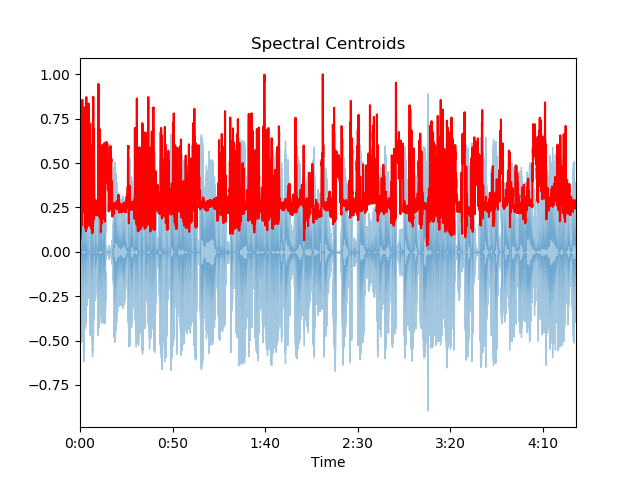

Shape of SpectralCentroids: (11543,)
Shape of Pitch: (1025, 11543)
RMS value is: 0.0856708676417944


In [58]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print("Number of ZeroCrossings in the entire waveform are:",sum(zero_crossings))
print("Shape of ZeroCrossing:",zero_crossings.shape)


#spectral centroids
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
%matplotlib notebook
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title("Spectral Centroids")
plt.show()
print("Shape of SpectralCentroids:",spectral_centroids.shape)


#Pitch
pitches, magnitudes = librosa.piptrack(x, sr=sr)
print("Shape of Pitch:",pitches.shape)


#RMS VALUE
rms = math.sqrt(numpy.mean(x*x))
print("RMS value is:",rms)

In [ ]:
#1
#MFCCs:  Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.
#The mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum nof a sound

#2
#The zero-crossing rate is the rate of sign-changes along a signal, i.e., 
#the rate at which the signal changes from positive to zero to negative or from negative to zero to positive.
#This feature has been used heavily in both speech recognition
#and music information retrieval, being a key feature to classify percussive sounds.


#3
#The spectral centroid is a measure used in digital signal processing to characterise a spectrum. 
#It indicates where the center of mass of the spectrum is located.

#4
#Pitch is a perceptual property of sounds that allows their ordering on a frequency-related scale,
#t is the quality that makes it possible to judge sounds as "higher" and "lower"  in the sense associated with
#musical melodies.

#5
#RMS is the root-mean-square value of a signal.
#It represents the average "power" of a signal.


#I would use Gaussian Mixture Models for content classification.

